In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
order_report=pd.read_excel(r'C:\Users\RAHUL\Desktop\Cointab Data Analyst - Challenge\Company X - Order Report.xlsx')
pin_cod_zon=pd.read_excel(r'C:\Users\RAHUL\Desktop\Cointab Data Analyst - Challenge\Company X - Pincode Zones.xlsx')
suv_master=pd.read_excel(r'C:\Users\RAHUL\Desktop\Cointab Data Analyst - Challenge\Company X - SKU Master.xlsx')
courier_invoice=pd.read_excel(r'C:\Users\RAHUL\Desktop\Cointab Data Analyst - Challenge\Courier Company - Invoice.xlsx')
courier_Rate=pd.read_excel(r'C:\Users\RAHUL\Desktop\Cointab Data Analyst - Challenge\Courier Company - Rates.xlsx')
Expected_Result=pd.read_excel(r'C:\Users\RAHUL\Desktop\Cointab Data Analyst - Challenge\Expected_Result.xlsx')

In [3]:
order_report.sample(5)

,ExternOrderNo,SKU,Order Qty
330,2001806735,8904223818850,1.0
249,2001807970,8904223819321,1.0
32,2001821190,8904223819338,1.0
397,2001806226,8904223818850,2.0
73,2001813009,8904223818706,1.0


In [4]:
order_report.isna().sum()

ExternOrderNo    0
SKU              0
Order Qty        0
dtype: int64

In [5]:
courier_invoice.sample(5)

,AWB Code,Order ID,Charged Weight,Warehouse Pincode,Customer Pincode,Zone,Type of Shipment,Billing Amount (Rs.)
30,1091121981575,2001825261,1.60,121003,517128,d,Forward and RTO charges,345.0
75,1091119367193,2001816131,0.70,121003,302017,d,Forward charges,90.2
8,1091117323812,2001807186,0.50,121003,396001,d,Forward charges,45.4
94,1091117229183,2001806968,0.68,121003,305801,d,Forward charges,90.2
19,1091117436383,2001808507,0.79,121003,208002,b,Forward charges,61.3


In [6]:
suv_master.sample(5)

,SKU,Weight (g)
45,8904223819239,290
7,8904223817334,170
59,8904223819321,600
21,8904223815804,160
31,8904223818980,110


In [7]:
Total_weight_KG=suv_master['Weight (g)']/1000

In [8]:
Total_weight_KG.head()

0    0.210
1    0.165
2    0.113
3    0.065
4    0.120
Name: Weight (g), dtype: float64

In [9]:
#Total weight as per Courier Company (KG)

Total_weight_Courier_Company_kg=Total_weight_KG

In [10]:
Total_weight_KG.isna().sum()

0

In [11]:
suv_master['Weight (g)']=suv_master['Weight (g)'].apply(lambda x: 0.5 if x<=500 else 1)

In [12]:
# Create a new column for the weight slab
suv_master['weight_slab'] = suv_master['Weight (g)'].replace('Weight (g)', 'weight_slab')

In [13]:
suv_master_new=suv_master.drop(['Weight (g)'],axis=1)

In [14]:
suv_master_new.head()

,SKU,weight_slab
0,8904223815682,0.5
1,8904223815859,0.5
2,8904223815866,0.5
3,8904223815873,0.5
4,8904223816214,0.5


In [15]:
pin_cod_zon.head()

,Warehouse Pincode,Customer Pincode,Zone
0,121003,507101,d
1,121003,486886,d
2,121003,532484,d
3,121003,143001,b
4,121003,515591,d


In [16]:
# company Zone
pin_cod_zon['Zone'].unique()

array(['d', 'b', 'e'], dtype=object)

In [17]:
#courier Zone
courier_invoice['Zone'].unique()

array(['d', 'b', 'e'], dtype=object)

In [18]:
courier_Rate

,fwd_a_fixed,fwd_a_additional,fwd_b_fixed,fwd_b_additional,fwd_c_fixed,fwd_c_additional,fwd_d_fixed,fwd_d_additional,fwd_e_fixed,fwd_e_additional,rto_a_fixed,rto_a_additional,rto_b_fixed,rto_b_additional,rto_c_fixed,rto_c_additional,rto_d_fixed,rto_d_additional,rto_e_fixed,rto_e_additional
0,29.5,23.6,33,28.3,40.1,38.9,45.4,44.8,56.6,55.5,13.6,23.6,20.5,28.3,31.9,38.9,41.3,44.8,50.7,55.5


In [19]:
Total_charge_a=courier_Rate['fwd_a_fixed']+courier_Rate['fwd_a_additional']

In [20]:
Total_charge_a

0    53.1
dtype: float64

In [21]:
Total_charge_b=courier_Rate['fwd_b_fixed']+courier_Rate['fwd_b_additional']
print(Total_charge_b)

0    61.3
dtype: float64


In [22]:
Total_charge_c=courier_Rate['fwd_c_fixed']+courier_Rate['fwd_c_additional']
print(Total_charge_c)

0    79.0
dtype: float64


In [23]:
Total_charge_d=courier_Rate['fwd_d_fixed']+courier_Rate['fwd_d_additional']
print(Total_charge_d)

0    90.2
dtype: float64


In [24]:
Total_rto_a=courier_Rate['rto_a_fixed']+courier_Rate['rto_a_additional']
print(Total_rto_a)

0    37.2
dtype: float64


In [25]:
Total_rto_b=courier_Rate['rto_b_fixed']+courier_Rate['rto_b_additional']
print(Total_rto_b)

0    48.8
dtype: float64


In [26]:
Total_rto_c=courier_Rate['rto_c_fixed']+courier_Rate['rto_c_additional']
print(Total_rto_c)

0    70.8
dtype: float64


In [27]:
Total_rto_d=courier_Rate['rto_d_fixed']+courier_Rate['rto_d_additional']
print(Total_rto_d)

0    86.1
dtype: float64


In [28]:
Total_rto_e=courier_Rate['rto_e_fixed']+courier_Rate['rto_e_additional']
print(Total_rto_e)

0    106.2
dtype: float64


In [29]:
courier_invoice['Zone'].unique()

array(['d', 'b', 'e'], dtype=object)

In [30]:
courier_invoice.shape

(124, 8)

In [31]:
order_report.rename(columns={'ExternOrderNo':'Order ID'},inplace=True)


In [32]:
order_report.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Order ID   400 non-null    int64  
 1   SKU        400 non-null    object 
 2   Order Qty  400 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 9.5+ KB


In [33]:
order_report.describe()


,Order ID,Order Qty
count,4.000000e+02,400.000000
mean,2.001811e+09,1.297500
std,5.187698e+03,0.919842
min,2.001806e+09,1.000000
25%,2.001807e+09,1.000000
50%,2.001809e+09,1.000000
75%,2.001812e+09,1.000000
max,2.001827e+09,8.000000


In [34]:
order_report.isnull().sum()

Order ID     0
SKU          0
Order Qty    0
dtype: int64

In [35]:
order_report.duplicated().sum()

2

In [36]:
order_report.shape

(400, 3)

In [37]:
order_report.columns

Index(['Order ID', 'SKU', 'Order Qty'], dtype='object')

In [38]:
order_report.dtypes

Order ID       int64
SKU           object
Order Qty    float64
dtype: object

In [39]:
order_report.nunique()

Order ID     124
SKU           65
Order Qty      6
dtype: int64

In [40]:
order_report.groupby('Order ID').size()

Order ID
2001806210    2
2001806226    1
2001806229    3
2001806232    2
2001806233    2
             ..
2001821995    2
2001822466    2
2001823564    3
2001825261    5
2001827036    8
Length: 124, dtype: int64

In [41]:
order_report.groupby('Order ID').size().sort_values(ascending=False)

Order ID
2001809820    14
2001827036     8
2001821185     8
2001817093     8
2001812854     8
              ..
2001820690     1
2001807012     1
2001806226     1
2001806768     1
2001807328     1
Length: 124, dtype: int64

In [42]:
order_report.groupby('Order ID').size().sort_values(ascending=False).head(10)

Order ID
2001809820    14
2001827036     8
2001821185     8
2001817093     8
2001812854     8
2001806471     7
2001809794     7
2001811192     6
2001808102     6
2001807058     6
dtype: int64

In [43]:
order_report.groupby('Order ID').size().sort_values(ascending=False).tail(10)

Order ID
2001821742    1
2001814580    1
2001807930    1
2001806823    1
2001806686    1
2001820690    1
2001807012    1
2001806226    1
2001806768    1
2001807328    1
dtype: int64

<AxesSubplot:xlabel='Order ID'>

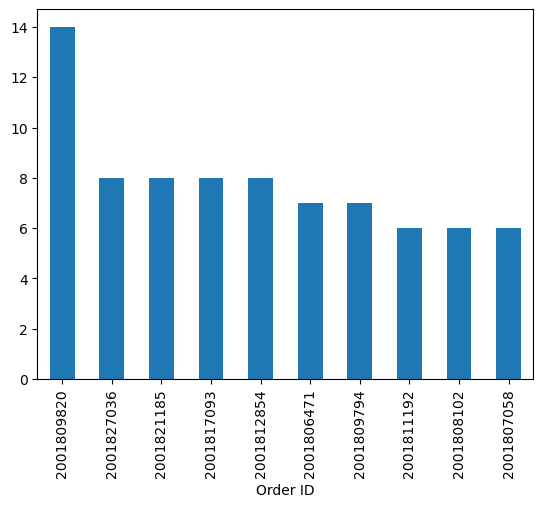

In [44]:
order_report.groupby('Order ID').size().sort_values(ascending=False).head(10).plot(kind='bar')


<AxesSubplot:xlabel='Order ID'>

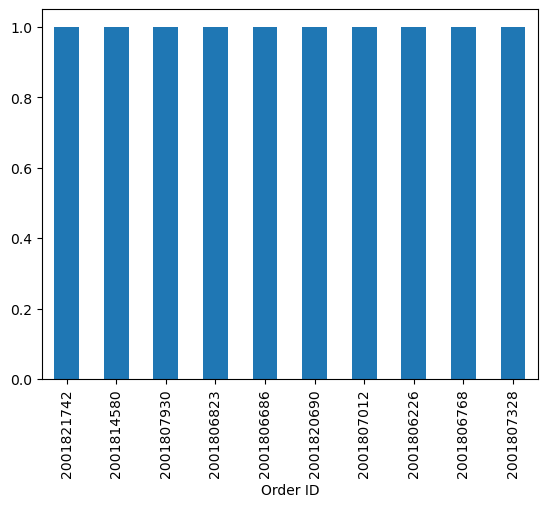

In [45]:
order_report.groupby('Order ID').size().sort_values(ascending=False).tail(10).plot(kind='bar')

<AxesSubplot:ylabel='Order ID'>

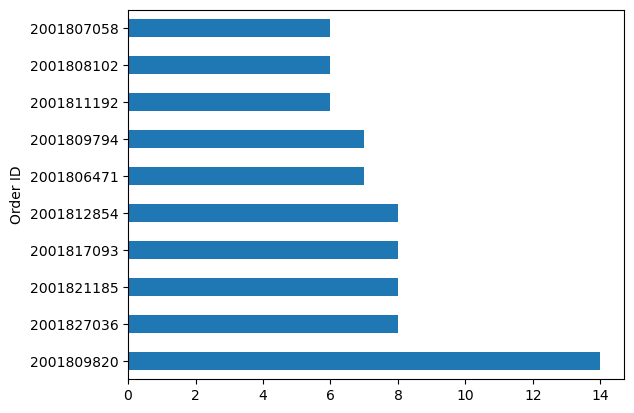

In [46]:
order_report.groupby('Order ID').size().sort_values(ascending=False).head(10).plot(kind='barh')

<AxesSubplot:ylabel='None'>

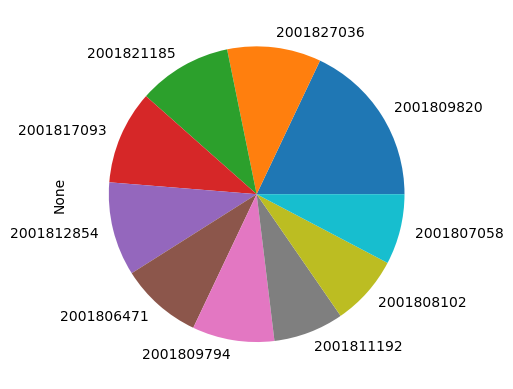

In [47]:
order_report.groupby('Order ID').size().sort_values(ascending=False).head(10).plot(kind='pie')

<AxesSubplot:>

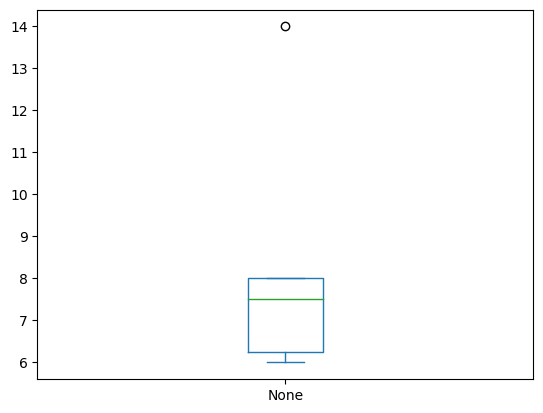

In [48]:
order_report.groupby('Order ID').size().sort_values(ascending=False).head(10).plot(kind='box')

In [49]:
courier_invoice.sample(5)

,AWB Code,Order ID,Charged Weight,Warehouse Pincode,Customer Pincode,Zone,Type of Shipment,Billing Amount (Rs.)
92,1091117228133,2001806823,0.59,121003,314001,d,Forward charges,90.2
82,1091121034641,2001821766,0.20,121003,313001,d,Forward charges,45.4
90,1091117222360,2001806304,0.71,121003,302017,d,Forward charges,90.2
49,1091117227573,2001806776,2.86,121003,226004,b,Forward charges,174.5
113,1091117806263,2001810549,1.86,121003,302017,d,Forward charges,179.8


In [50]:
courier_invoice_group=courier_invoice.groupby(['Zone','Type of Shipment'])

In [51]:
courier_invoice_group_weight=courier_invoice_group['Charged Weight'].sum()


In [52]:
#creat data set for total Charged_weight
courier_invoice_group_weight

Zone  Type of Shipment       
b     Forward and RTO charges     1.90
      Forward charges            24.60
d     Forward and RTO charges     8.77
      Forward charges            82.28
e     Forward and RTO charges     1.00
Name: Charged Weight, dtype: float64

In [53]:
#creat data set for total price

courier_invoice_group_price=courier_invoice_group['Charged Weight'].sum()


In [54]:
#reset index
courier_invoice_groupby=courier_invoice.reset_index()
courier_invoice_groupby.head()

,index,AWB Code,Order ID,Charged Weight,Warehouse Pincode,Customer Pincode,Zone,Type of Shipment,Billing Amount (Rs.)
0,0,1091117222124,2001806232,1.30,121003,507101,d,Forward charges,135.0
1,1,1091117222194,2001806273,1.00,121003,486886,d,Forward charges,90.2
2,2,1091117222931,2001806408,2.50,121003,532484,d,Forward charges,224.6
3,3,1091117223244,2001806458,1.00,121003,143001,b,Forward charges,61.3
4,4,1091117229345,2001807012,0.15,121003,515591,d,Forward charges,45.4


In [55]:
courier_invoice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AWB Code              124 non-null    int64  
 1   Order ID              124 non-null    int64  
 2   Charged Weight        124 non-null    float64
 3   Warehouse Pincode     124 non-null    int64  
 4   Customer Pincode      124 non-null    int64  
 5   Zone                  124 non-null    object 
 6   Type of Shipment      124 non-null    object 
 7   Billing Amount (Rs.)  124 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 7.9+ KB


In [56]:
courier_invoice.describe()

,AWB Code,Order ID,Charged Weight,Warehouse Pincode,Customer Pincode,Billing Amount (Rs.)
count,1.240000e+02,1.240000e+02,124.000000,124.0,124.000000,124.000000
mean,1.091118e+12,2.001811e+09,0.956048,121003.0,365488.072581,110.066129
std,1.473661e+06,5.167329e+03,0.662815,0.0,152156.322130,64.060832
min,1.091117e+12,2.001806e+09,0.150000,121003.0,140301.000000,33.000000
25%,1.091117e+12,2.001807e+09,0.667500,121003.0,302017.000000,86.700000
50%,1.091117e+12,2.001809e+09,0.725000,121003.0,321304.500000,90.200000
75%,1.091119e+12,2.001812e+09,1.100000,121003.0,405102.250000,135.000000
max,1.091122e+12,2.001827e+09,4.130000,121003.0,845438.000000,403.800000


In [57]:
courier_invoice.isnull().sum()

AWB Code                0
Order ID                0
Charged Weight          0
Warehouse Pincode       0
Customer Pincode        0
Zone                    0
Type of Shipment        0
Billing Amount (Rs.)    0
dtype: int64

In [58]:
courier_invoice.columns

Index(['AWB Code', 'Order ID', 'Charged Weight', 'Warehouse Pincode',
       'Customer Pincode', 'Zone', 'Type of Shipment', 'Billing Amount (Rs.)'],
      dtype='object')

In [59]:
courier_invoice.shape


(124, 8)

In [60]:
courier_invoice.dtypes

AWB Code                  int64
Order ID                  int64
Charged Weight          float64
Warehouse Pincode         int64
Customer Pincode          int64
Zone                     object
Type of Shipment         object
Billing Amount (Rs.)    float64
dtype: object

In [61]:
courier_invoice.nunique()

AWB Code                124
Order ID                124
Charged Weight           54
Warehouse Pincode         1
Customer Pincode        108
Zone                      3
Type of Shipment          2
Billing Amount (Rs.)     20
dtype: int64

In [62]:
courier_invoice.groupby('Type of Shipment').count()

,AWB Code,Order ID,Charged Weight,Warehouse Pincode,Customer Pincode,Zone,Billing Amount (Rs.)
Type of Shipment,,,,,,,
Forward and RTO charges,15,15,15,15,15,15,15
Forward charges,109,109,109,109,109,109,109


In [63]:
courier_invoice.groupby('Zone').count()

,AWB Code,Order ID,Charged Weight,Warehouse Pincode,Customer Pincode,Type of Shipment,Billing Amount (Rs.)
Zone,,,,,,,
b,24,24,24,24,24,24,24
d,98,98,98,98,98,98,98
e,2,2,2,2,2,2,2


In [64]:
courier_invoice.groupby('Type of Shipment').sum()

,AWB Code,Order ID,Charged Weight,Warehouse Pincode,Customer Pincode,Billing Amount (Rs.)
Type of Shipment,,,,,,
Forward and RTO charges,16366792436826,30027225332,11.67,1815045,6994512,2561.1
Forward charges,118931867272952,218197307648,106.88,13189327,38326009,11087.1


In [65]:
courier_invoice.groupby('Zone').sum()

,AWB Code,Order ID,Charged Weight,Warehouse Pincode,Customer Pincode,Billing Amount (Rs.)
Zone,,,,,,
b,26186834344767,48043432119,26.50,2904072,4978452,1969.9
d,106929587914889,196177474176,91.05,11858294,38885766,11357.5
e,2182237450122,4003626685,1.00,242006,1456303,320.8


In [66]:
courier_invoice.groupby('Type of Shipment').mean()

,AWB Code,Order ID,Charged Weight,Warehouse Pincode,Customer Pincode,Billing Amount (Rs.)
Type of Shipment,,,,,,
Forward and RTO charges,1.091119e+12,2.001815e+09,0.77800,121003.0,466300.800000,170.740000
Forward charges,1.091118e+12,2.001810e+09,0.98055,121003.0,351614.761468,101.716514


In [67]:
courier_invoice.groupby('Zone').mean()

,AWB Code,Order ID,Charged Weight,Warehouse Pincode,Customer Pincode,Billing Amount (Rs.)
Zone,,,,,,
b,1.091118e+12,2.001810e+09,1.104167,121003.0,207435.500000,82.079167
d,1.091118e+12,2.001811e+09,0.929082,121003.0,396793.530612,115.892857
e,1.091119e+12,2.001813e+09,0.500000,121003.0,728151.500000,160.400000


In [68]:
courier_invoice.groupby('Type of Shipment').median()

,AWB Code,Order ID,Charged Weight,Warehouse Pincode,Customer Pincode,Billing Amount (Rs.)
Type of Shipment,,,,,,
Forward and RTO charges,1.091119e+12,2.001815e+09,0.70,121003.0,411014.0,172.8
Forward charges,1.091117e+12,2.001808e+09,0.73,121003.0,313333.0,90.2


In [69]:
courier_invoice.groupby('Type of Shipment').min()

,AWB Code,Order ID,Charged Weight,Warehouse Pincode,Customer Pincode,Zone,Billing Amount (Rs.)
Type of Shipment,,,,,,,
Forward and RTO charges,1091117327496,2001807976,0.15,121003,244001,b,86.7
Forward charges,1091117221940,2001806210,0.15,121003,140301,b,33.0


In [70]:
#Merging the dataframes
merge1=pd.merge(order_report,courier_invoice,how='left',on='Order ID')


In [71]:
merge1

,Order ID,SKU,Order Qty,AWB Code,Charged Weight,Warehouse Pincode,Customer Pincode,Zone,Type of Shipment,Billing Amount (Rs.)
0,2001827036,8904223818706,1.0,1091122418320,1.60,121003,173213,b,Forward charges,117.9
1,2001827036,8904223819093,1.0,1091122418320,1.60,121003,173213,b,Forward charges,117.9
2,2001827036,8904223819109,1.0,1091122418320,1.60,121003,173213,b,Forward charges,117.9
3,2001827036,8904223818430,1.0,1091122418320,1.60,121003,173213,b,Forward charges,117.9
4,2001827036,8904223819277,1.0,1091122418320,1.60,121003,173213,b,Forward charges,117.9
...,...,...,...,...,...,...,...,...,...,...
395,2001806229,8904223818942,1.0,1091117222080,0.71,121003,421204,d,Forward charges,90.2
396,2001806229,8904223818850,1.0,1091117222080,0.71,121003,421204,d,Forward charges,90.2
397,2001806226,8904223818850,2.0,1091117222065,0.68,121003,723146,d,Forward charges,90.2
398,2001806210,8904223816214,1.0,1091117221940,2.92,121003,140604,b,Forward charges,174.5


In [72]:
#Merging the dataframes
merge2=pd.merge(pin_cod_zon,courier_invoice,how='left',on='Zone')


In [73]:
merge2

,Warehouse Pincode_x,Customer Pincode_x,Zone,AWB Code,Order ID,Charged Weight,Warehouse Pincode_y,Customer Pincode_y,Type of Shipment,Billing Amount (Rs.)
0,121003,507101,d,1091117222124,2001806232,1.30,121003,507101,Forward charges,135.0
1,121003,507101,d,1091117222194,2001806273,1.00,121003,486886,Forward charges,90.2
2,121003,507101,d,1091117222931,2001806408,2.50,121003,532484,Forward charges,224.6
3,121003,507101,d,1091117229345,2001807012,0.15,121003,515591,Forward charges,45.4
4,121003,507101,d,1091117229555,2001806686,0.15,121003,326502,Forward charges,45.4
...,...,...,...,...,...,...,...,...,...,...
5629,121003,302020,b,1091118004245,2001811604,0.80,121003,173212,Forward charges,61.3
5630,121003,302020,b,1091120352712,2001819252,0.30,121003,174101,Forward charges,33.0
5631,121003,302020,b,1091122418320,2001827036,1.60,121003,173213,Forward charges,117.9
5632,121003,302020,b,1091117436652,2001808585,0.72,121003,175101,Forward charges,61.3


In [74]:
#Merging the dataframes
merge3=pd.merge(order_report,suv_master,how='left',on='SKU')

In [75]:
merge3

,Order ID,SKU,Order Qty,Weight (g),weight_slab
0,2001827036,8904223818706,1.0,0.5,0.5
1,2001827036,8904223819093,1.0,0.5,0.5
2,2001827036,8904223819109,1.0,0.5,0.5
3,2001827036,8904223818430,1.0,0.5,0.5
4,2001827036,8904223819277,1.0,0.5,0.5
...,...,...,...,...,...
396,2001806229,8904223818942,1.0,0.5,0.5
397,2001806229,8904223818850,1.0,0.5,0.5
398,2001806226,8904223818850,2.0,0.5,0.5
399,2001806210,8904223816214,1.0,0.5,0.5


In [76]:
courier_invoice.sample(2)

,AWB Code,Order ID,Charged Weight,Warehouse Pincode,Customer Pincode,Zone,Type of Shipment,Billing Amount (Rs.)
115,1091117904860,2001811039,0.68,121003,302020,d,Forward charges,90.2
8,1091117323812,2001807186,0.50,121003,396001,d,Forward charges,45.4


In [77]:
courier_Rate

,fwd_a_fixed,fwd_a_additional,fwd_b_fixed,fwd_b_additional,fwd_c_fixed,fwd_c_additional,fwd_d_fixed,fwd_d_additional,fwd_e_fixed,fwd_e_additional,rto_a_fixed,rto_a_additional,rto_b_fixed,rto_b_additional,rto_c_fixed,rto_c_additional,rto_d_fixed,rto_d_additional,rto_e_fixed,rto_e_additional
0,29.5,23.6,33,28.3,40.1,38.9,45.4,44.8,56.6,55.5,13.6,23.6,20.5,28.3,31.9,38.9,41.3,44.8,50.7,55.5


In [78]:
courier_invoice['Type of Shipment'].unique()

array(['Forward charges', 'Forward and RTO charges'], dtype=object)

In [79]:
#creat data set ('Forward charges':29.5,'Forward and RTO charges':43.1).groupby(courier_invoice['Zone'])


In [80]:
#Expected Charge as per X (Rs.)
courier_invoice['Zone_d'] = courier_invoice['Type of Shipment'].map({'Forward charges':45.4,'Forward and RTO charges':86.7})
courier_invoice['Zone_b'] = courier_invoice['Type of Shipment'].map({'Forward charges':33,'Forward and RTO charges':53.5})
courier_invoice['Zone_e'] = courier_invoice['Type of Shipment'].map({'Forward charges':56.6,'Forward and RTO charges':107.3})


In [81]:
#Delivery Zone charged by Courier Company
courier_invoice['Zone_d_Courier'] = courier_invoice['Type of Shipment'].map({'Forward charges':89.8,'Forward and RTO charges':134.6})
courier_invoice['Zone_b_Courier'] = courier_invoice['Type of Shipment'].map({'Forward charges':61.3,'Forward and RTO charges':89.6})
courier_invoice['Zone_e_Courier'] = courier_invoice['Type of Shipment'].map({'Forward charges':112.1,'Forward and RTO charges':167.6})

In [82]:
courier_invoice

,AWB Code,Order ID,Charged Weight,Warehouse Pincode,Customer Pincode,Zone,Type of Shipment,Billing Amount (Rs.),Zone_d,Zone_b,Zone_e,Zone_d_Courier,Zone_b_Courier,Zone_e_Courier
0,1091117222124,2001806232,1.30,121003,507101,d,Forward charges,135.0,45.4,33.0,56.6,89.8,61.3,112.1
1,1091117222194,2001806273,1.00,121003,486886,d,Forward charges,90.2,45.4,33.0,56.6,89.8,61.3,112.1
2,1091117222931,2001806408,2.50,121003,532484,d,Forward charges,224.6,45.4,33.0,56.6,89.8,61.3,112.1
3,1091117223244,2001806458,1.00,121003,143001,b,Forward charges,61.3,45.4,33.0,56.6,89.8,61.3,112.1
4,1091117229345,2001807012,0.15,121003,515591,d,Forward charges,45.4,45.4,33.0,56.6,89.8,61.3,112.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,1091118551656,2001812941,0.73,121003,325207,d,Forward charges,90.2,45.4,33.0,56.6,89.8,61.3,112.1
120,1091117614452,2001809383,0.50,121003,303702,d,Forward and RTO charges,86.7,86.7,53.5,107.3,134.6,89.6,167.6
121,1091120922803,2001820978,0.50,121003,313301,d,Forward charges,45.4,45.4,33.0,56.6,89.8,61.3,112.1
122,1091121844806,2001811475,0.50,121003,173212,b,Forward charges,33.0,45.4,33.0,56.6,89.8,61.3,112.1


In [83]:
courier_invoice.isna().sum()

AWB Code                0
Order ID                0
Charged Weight          0
Warehouse Pincode       0
Customer Pincode        0
Zone                    0
Type of Shipment        0
Billing Amount (Rs.)    0
Zone_d                  0
Zone_b                  0
Zone_e                  0
Zone_d_Courier          0
Zone_b_Courier          0
Zone_e_Courier          0
dtype: int64

In [84]:
courier_invoice.drop(['Zone','Type of Shipment'],axis=1,inplace=True)

In [85]:
courier_invoice.dtypes

AWB Code                  int64
Order ID                  int64
Charged Weight          float64
Warehouse Pincode         int64
Customer Pincode          int64
Billing Amount (Rs.)    float64
Zone_d                  float64
Zone_b                  float64
Zone_e                  float64
Zone_d_Courier          float64
Zone_b_Courier          float64
Zone_e_Courier          float64
dtype: object

In [86]:
#Expected Charge as per X (Rs.)
courier_invoice['Expected_Charge_as_per_X']=courier_invoice['Zone_d']+courier_invoice['Zone_b']+courier_invoice['Zone_e']

In [87]:
courier_invoice

,AWB Code,Order ID,Charged Weight,Warehouse Pincode,Customer Pincode,Billing Amount (Rs.),Zone_d,Zone_b,Zone_e,Zone_d_Courier,Zone_b_Courier,Zone_e_Courier,Expected_Charge_as_per_X
0,1091117222124,2001806232,1.30,121003,507101,135.0,45.4,33.0,56.6,89.8,61.3,112.1,135.0
1,1091117222194,2001806273,1.00,121003,486886,90.2,45.4,33.0,56.6,89.8,61.3,112.1,135.0
2,1091117222931,2001806408,2.50,121003,532484,224.6,45.4,33.0,56.6,89.8,61.3,112.1,135.0
3,1091117223244,2001806458,1.00,121003,143001,61.3,45.4,33.0,56.6,89.8,61.3,112.1,135.0
4,1091117229345,2001807012,0.15,121003,515591,45.4,45.4,33.0,56.6,89.8,61.3,112.1,135.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,1091118551656,2001812941,0.73,121003,325207,90.2,45.4,33.0,56.6,89.8,61.3,112.1,135.0
120,1091117614452,2001809383,0.50,121003,303702,86.7,86.7,53.5,107.3,134.6,89.6,167.6,247.5
121,1091120922803,2001820978,0.50,121003,313301,45.4,45.4,33.0,56.6,89.8,61.3,112.1,135.0
122,1091121844806,2001811475,0.50,121003,173212,33.0,45.4,33.0,56.6,89.8,61.3,112.1,135.0


In [88]:
#Charges Billed by Courier Company (Rs.)
courier_invoice['Charges Billed by Courier Company (Rs.)']=courier_invoice['Zone_d_Courier']+courier_invoice['Zone_b_Courier']+courier_invoice['Zone_e_Courier']

In [89]:
courier_invoice.head()

,AWB Code,Order ID,Charged Weight,Warehouse Pincode,Customer Pincode,Billing Amount (Rs.),Zone_d,Zone_b,Zone_e,Zone_d_Courier,Zone_b_Courier,Zone_e_Courier,Expected_Charge_as_per_X,Charges Billed by Courier Company (Rs.)
0,1091117222124,2001806232,1.30,121003,507101,135.0,45.4,33.0,56.6,89.8,61.3,112.1,135.0,263.2
1,1091117222194,2001806273,1.00,121003,486886,90.2,45.4,33.0,56.6,89.8,61.3,112.1,135.0,263.2
2,1091117222931,2001806408,2.50,121003,532484,224.6,45.4,33.0,56.6,89.8,61.3,112.1,135.0,263.2
3,1091117223244,2001806458,1.00,121003,143001,61.3,45.4,33.0,56.6,89.8,61.3,112.1,135.0,263.2
4,1091117229345,2001807012,0.15,121003,515591,45.4,45.4,33.0,56.6,89.8,61.3,112.1,135.0,263.2


In [90]:
#Difference Between Expected Charges and Billed Charges (Rs.)
courier_invoice['Difference Between Expected Charges and Billed Charges (Rs.']=courier_invoice['Expected_Charge_as_per_X']-courier_invoice['Billing Amount (Rs.)']

In [91]:
courier_invoice.sample(5)

,AWB Code,Order ID,Charged Weight,Warehouse Pincode,Customer Pincode,Billing Amount (Rs.),Zone_d,Zone_b,Zone_e,Zone_d_Courier,Zone_b_Courier,Zone_e_Courier,Expected_Charge_as_per_X,Charges Billed by Courier Company (Rs.),Difference Between Expected Charges and Billed Charges (Rs.
42,1091117224902,2001806567,1.16,121003,370201,135.0,45.4,33.0,56.6,89.8,61.3,112.1,135.0,263.2,0.0
91,1091117227116,2001806768,1.02,121003,322201,135.0,45.4,33.0,56.6,89.8,61.3,112.1,135.0,263.2,0.0
19,1091117436383,2001808507,0.79,121003,208002,61.3,45.4,33.0,56.6,89.8,61.3,112.1,135.0,263.2,73.7
31,1091117957780,2001811192,1.13,121003,562110,258.9,86.7,53.5,107.3,134.6,89.6,167.6,247.5,391.8,-11.4
59,1091117223351,2001806471,1.70,121003,313027,179.8,45.4,33.0,56.6,89.8,61.3,112.1,135.0,263.2,-44.8


In [92]:
courier_invoice.columns

Index(['AWB Code', 'Order ID', 'Charged Weight', 'Warehouse Pincode',
       'Customer Pincode', 'Billing Amount (Rs.)', 'Zone_d', 'Zone_b',
       'Zone_e', 'Zone_d_Courier', 'Zone_b_Courier', 'Zone_e_Courier',
       'Expected_Charge_as_per_X', 'Charges Billed by Courier Company (Rs.)',
       'Difference Between Expected Charges and Billed Charges (Rs.'],
      dtype='object')

C:\Users\RAHUL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Difference Between Expected Charges and Billed Charges (Rs.', ylabel='Density'>

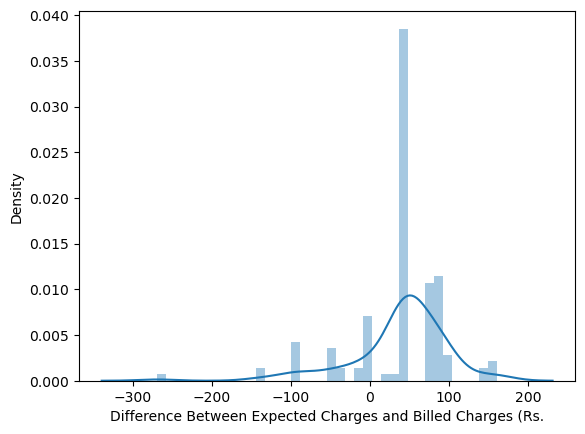

In [93]:
sns.distplot(courier_invoice['Difference Between Expected Charges and Billed Charges (Rs.'])

C:\Users\RAHUL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Charges Billed by Courier Company (Rs.)', ylabel='Density'>

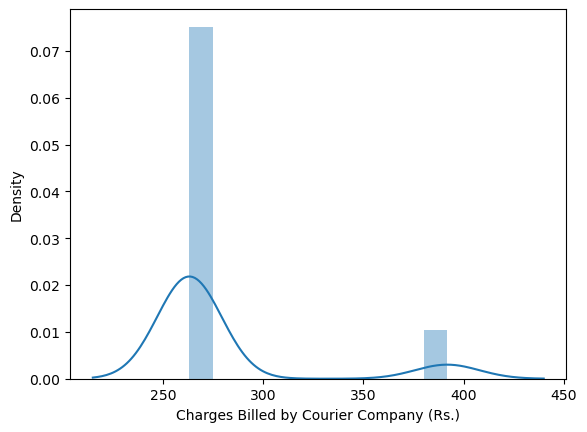

In [94]:
sns.distplot(courier_invoice['Charges Billed by Courier Company (Rs.)'])

C:\Users\RAHUL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Expected_Charge_as_per_X', ylabel='Density'>

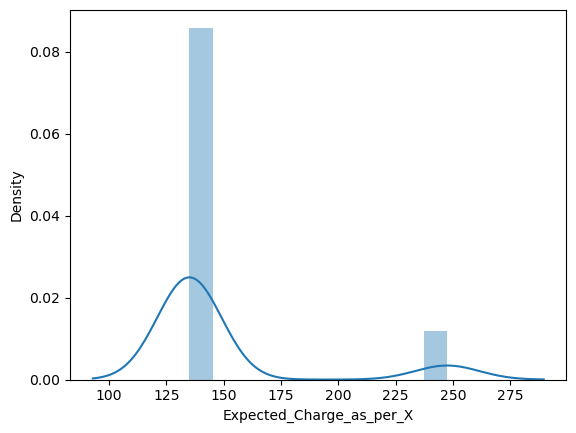

In [95]:
sns.distplot(courier_invoice['Expected_Charge_as_per_X'])

<AxesSubplot:xlabel='Expected_Charge_as_per_X', ylabel='Charges Billed by Courier Company (Rs.)'>

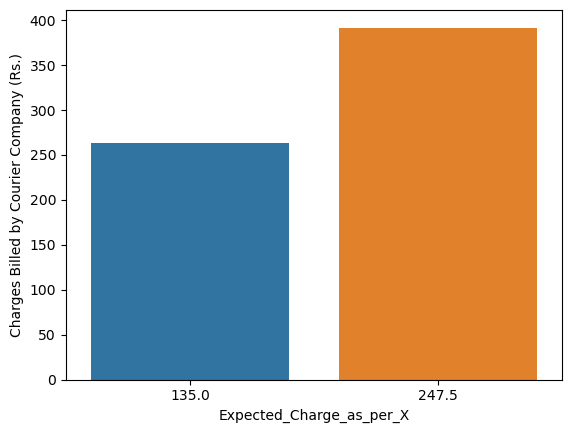

In [96]:
sns.barplot(x=courier_invoice['Expected_Charge_as_per_X'],y=courier_invoice['Charges Billed by Courier Company (Rs.)'])

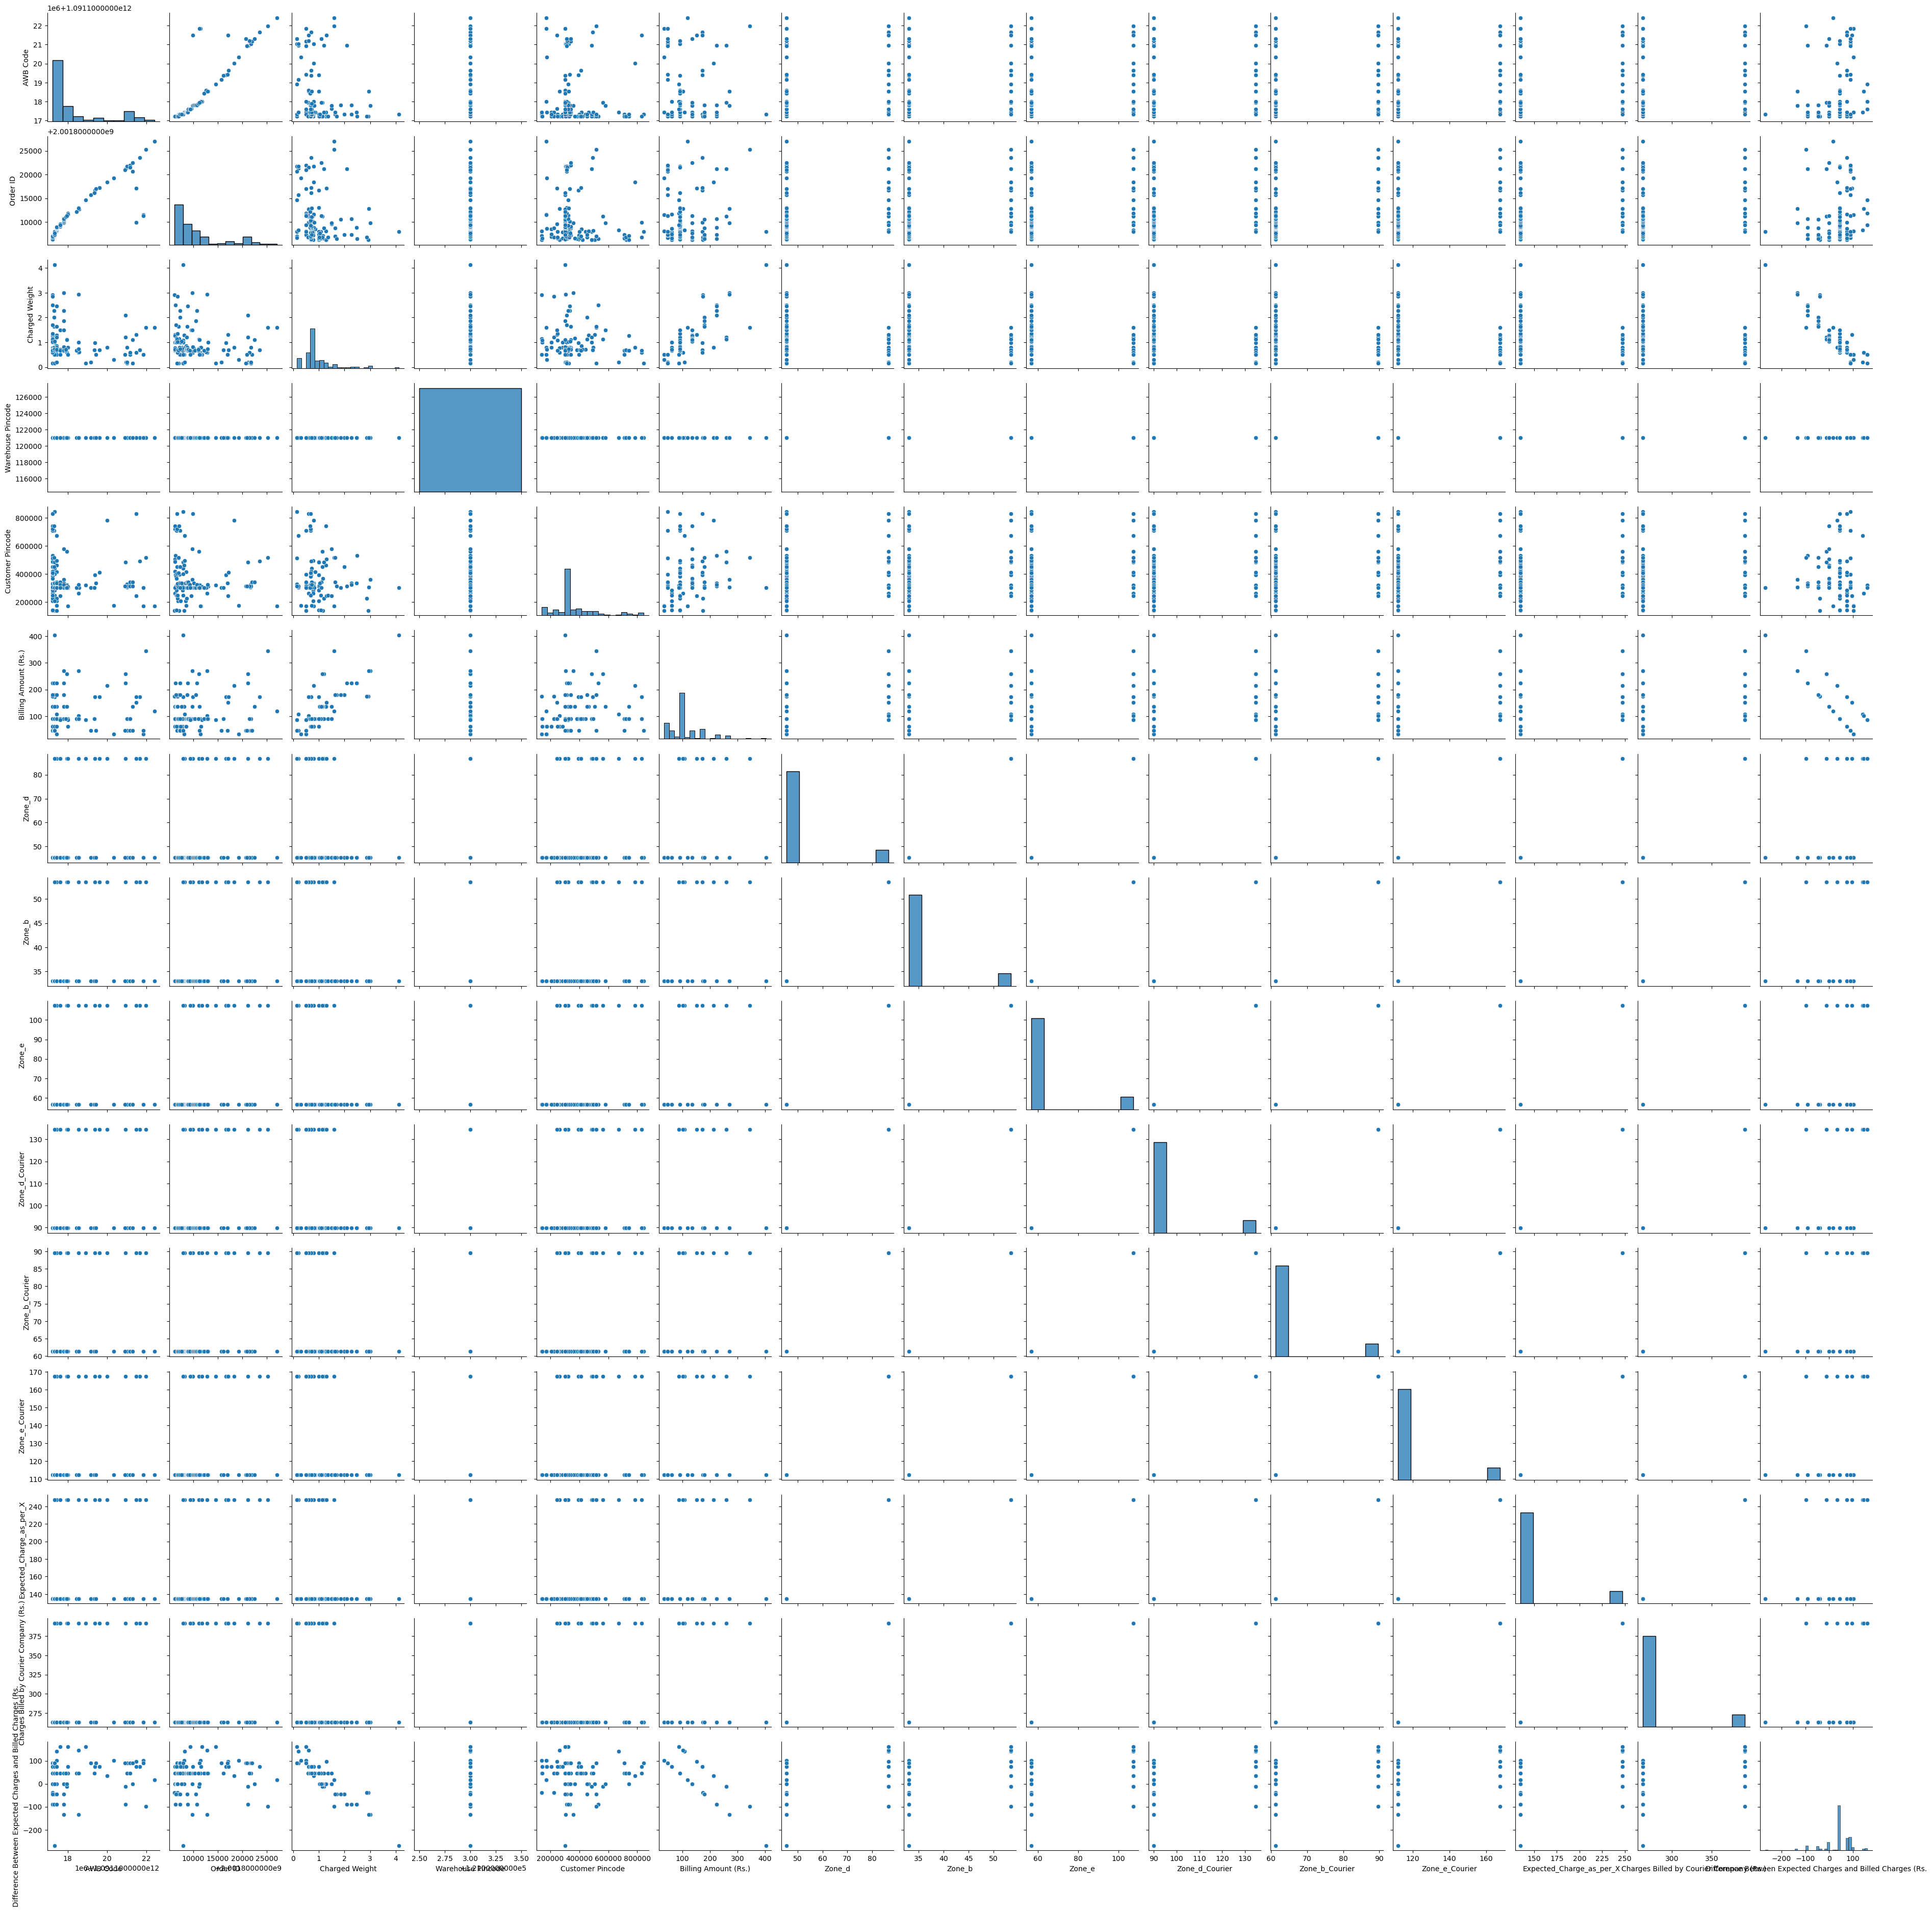

In [97]:
sns.pairplot(courier_invoice)

In [113]:

e_courier=courier_invoice.to_csv('C://Users//RAHUL//Desktop//Cointab Data Analyst')



In [119]:
#Output Data 2
#Create a summary table
#Count Amount (Rs.)
Total_orders_X_charged=courier_invoice['Expected_Charge_as_per_X'].count()


In [120]:
##Count 
Total_orders_X_charged

124

In [122]:
#Amount (Rs.)
Total_orders_X_charged_sum=courier_invoice['Expected_Charge_as_per_X'].sum()

In [123]:
Total_orders_X_charged_sum

18427.5

In [125]:
Expected_Result.head()

,Unnamed: 0,Count,Amount
0,Total Orders - Correctly Charged,1.0,135.0
1,Total Orders - Over Charged,1.0,-141.5
2,Total Orders - Under Charged,NaN,NaN


In [ ]:
courier_invoice['']